## Задание 1

### Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [1]:
import pandas as pd
file_path = '/Users/vladasliusar/Downloads/train - train.csv'
df = pd.read_csv(file_path)
df.head()

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"


In [2]:
df.count

<bound method DataFrame.count of         ID  Order Date     Class       Region Sub-Category     Sales
0      646  30/12/2018  Стандарт         Урал   Appliances  37229,08
1      907  30/12/2018  Стандарт  Владивосток    Bookcases  20994,61
2      908  30/12/2018  Стандарт  Владивосток       Phones  42133,86
3      909  30/12/2018  Стандарт  Владивосток      Binders     10612
4     1297  30/12/2018  Стандарт   Калиниград      Binders  28781,13
...    ...         ...       ...          ...          ...       ...
9795  1760  05/01/2015  Стандарт  Владивосток          Art  8639,472
9796   740  04/01/2015  Стандарт         Урал       Labels  15246,05
9797   741  04/01/2015  Стандарт         Урал      Storage  20415,81
9798   742  04/01/2015  Стандарт         Урал      Binders  4559,085
9799  7981  03/01/2015  Стандарт         Урал        Paper  11726,47

[9800 rows x 6 columns]>

In [3]:
df['Sales'] = df['Sales'].str.replace(',', '').astype(float)

In [4]:
sub_category_counts = df['Sub-Category'].value_counts()
sub_category_counts.head(4)

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: count, dtype: int64

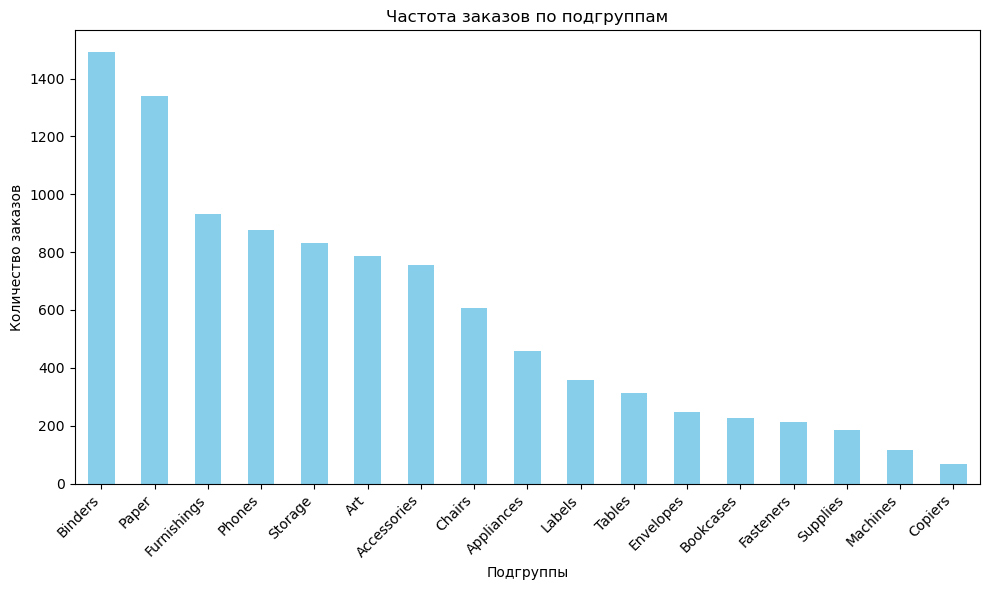

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sub_category_counts.plot(kind='bar', color='skyblue')
plt.title('Частота заказов по подгруппам')
plt.xlabel('Подгруппы')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

#### Для ответа на этот вопрос я предположу, что вас интересуют последние 2 года от самой поздней даты, которой является 30 декабря 2018 года. Соответственно, период последних 2 лет: 30 декабря 2016 года по 30 декабря 2018 года. 

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
latest_date = df['Order Date'].max()
latest_date

Timestamp('2018-12-30 00:00:00')

In [7]:
two_years_before = latest_date - pd.DateOffset(years=2)

df_last_two_years = df[(df['Order Date'] >= two_years_before) & (df['Order Date'] <= latest_date)]

subcategory2 = df_last_two_years['Sub-Category'].value_counts()

top_sub_categories2 = subcategory2.head(4)
top_sub_categories2

Sub-Category
Binders        907
Paper          810
Furnishings    558
Phones         511
Name: count, dtype: int64

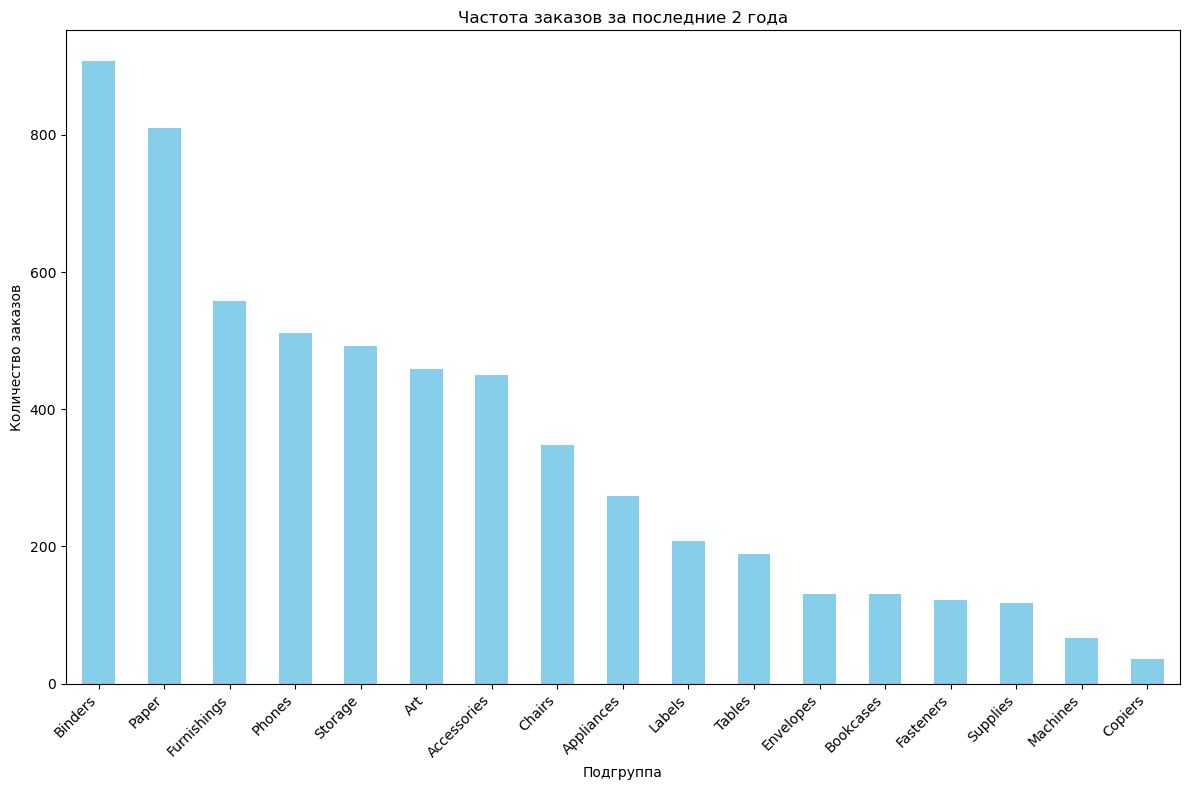

In [8]:
plt.figure(figsize=(12, 8))
subcategory2.plot(kind='bar', color='skyblue')
plt.title('Частота заказов за последние 2 года')
plt.xlabel('Подгруппа')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [9]:
one_year_before = latest_date - pd.DateOffset(years=1)

df_last_one_year = df[(df['Order Date'] >= one_year_before) & (df['Order Date'] <= latest_date)]

sub_category_1 = df_last_one_year['Sub-Category'].value_counts()

top_sub_categories1 = sub_category_1.head(4)
top_sub_categories1

Sub-Category
Binders        496
Paper          454
Furnishings    310
Phones         291
Name: count, dtype: int64

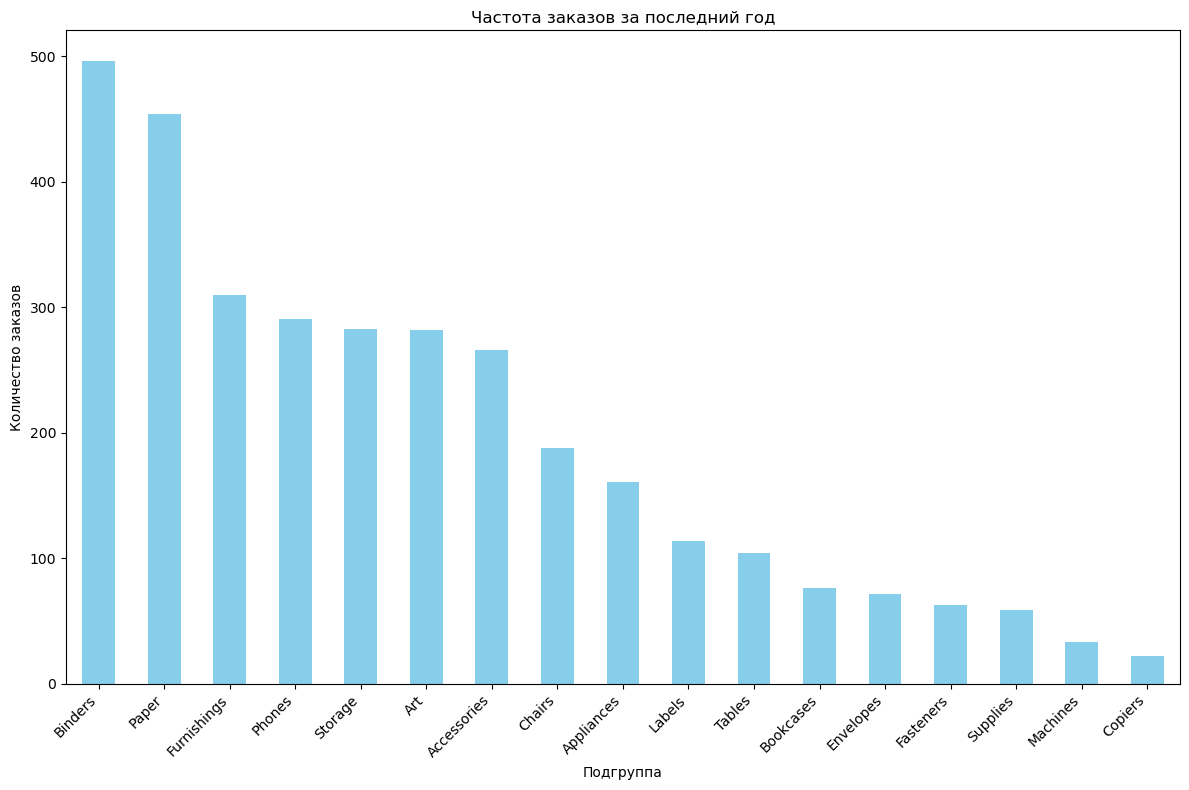

In [10]:
plt.figure(figsize=(12, 8))
sub_category_1.plot(kind='bar', color='skyblue')
plt.title('Частота заказов за последний год')
plt.xlabel('Подгруппа')
plt.ylabel('Количество заказов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Выводы:

##### Папки (Binders) и бумага (paper) стабильно остаются самыми востребованными подкатегориями, что свидетельствует о постоянном спросе на основные офисные принадлежности. В целом не выявлено изменений в частоте заказов ни за все время, ни за последние годы, что значит, что спрос на товары стабилен.

## Задание 2

### Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин). Можно использовать правило трех сигм. Однако любые другие решения приветствуются.

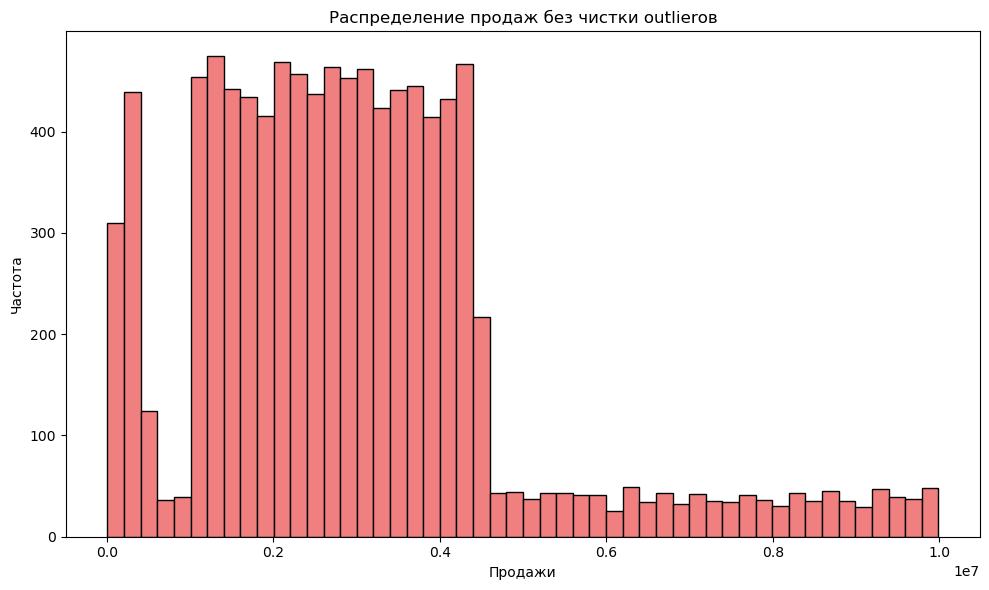

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Распределение продаж без чистки outlierов')
plt.xlabel('Продажи')
plt.ylabel('Частота')
plt.tight_layout()

plt.show()

#### Посмотрев изначальное распределение мне не показалось, что в данных есть очевидные аномалии, но так как нужно представить мажоритарную черту, я бы убрала данные с большими значениями не по правилу 3-х сигм, а по 2-м.

In [12]:
import numpy as np

mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()

lower_bound = mean_sales - 3 * std_sales
upper_bound = mean_sales + 2 * std_sales

df_cleaned = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

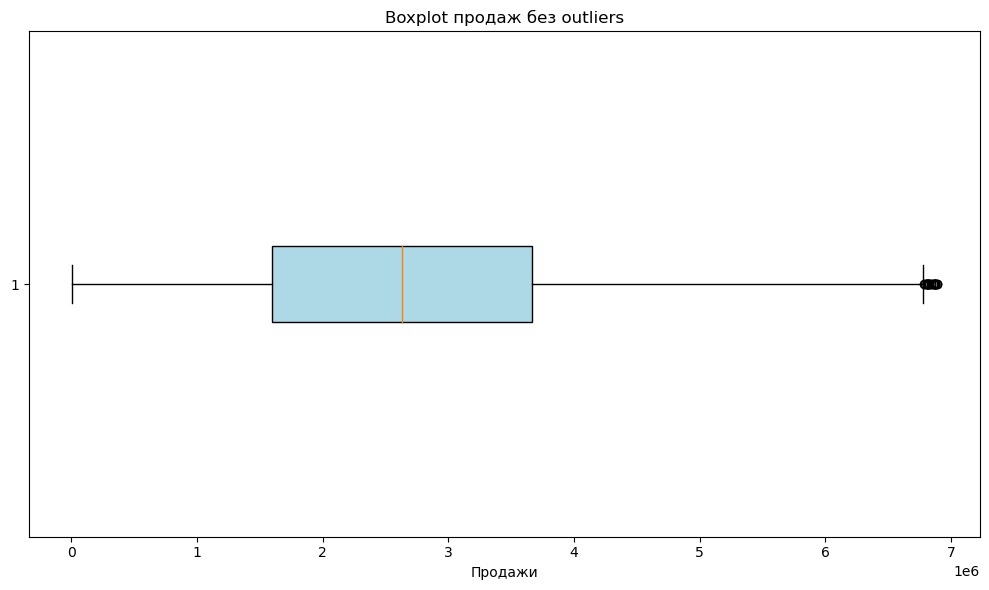

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_cleaned['Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot продаж без outliers')
plt.xlabel('Продажи')
plt.tight_layout()

plt.show()

#### Для сравнения: график, который показывает боксплот с убранными верхними значениями по правилу 3-х сигм:

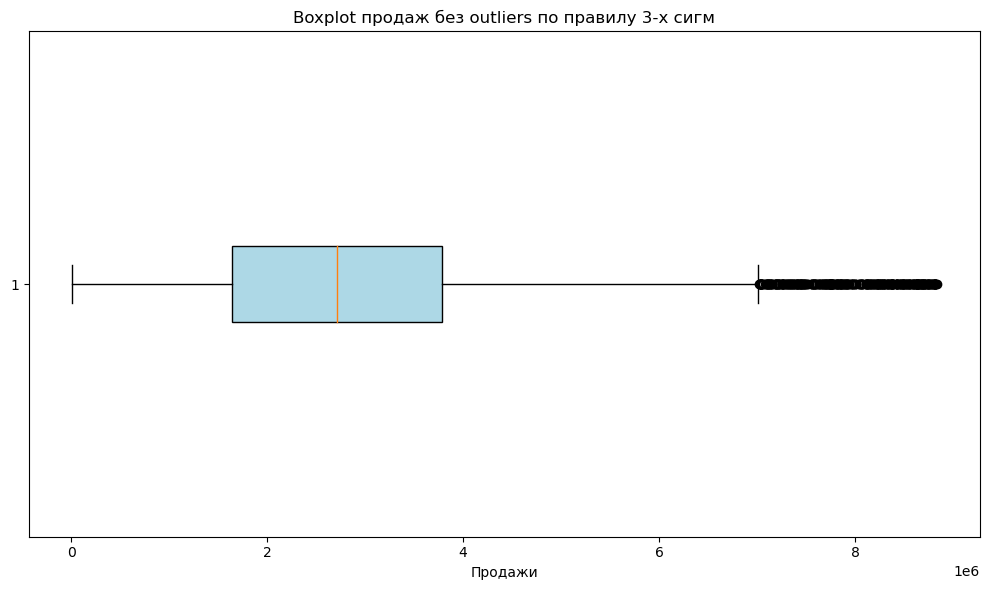

In [14]:
lower_bound_3 = mean_sales - 3 * std_sales
upper_bound_3 = mean_sales + 3 * std_sales

df_cleaned_3 = df[(df['Sales'] >= lower_bound_3) & (df['Sales'] <= upper_bound_3)]

plt.figure(figsize=(10, 6))
plt.boxplot(df_cleaned_3['Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot продаж без outliers по правилу 3-х сигм')
plt.xlabel('Продажи')
plt.tight_layout()

plt.show()

## Задание 3

### Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales.

In [15]:
df['Sales_group'] = pd.qcut(df['Sales'], q=4, labels=[f'Group {i+1}' for i in range(4)])

df[['Sales', 'Sales_group']].head()

,Sales,Sales_group
0,3722908.0,Group 3
1,2099461.0,Group 2
2,4213386.0,Group 4
3,10612.0,Group 1
4,2878113.0,Group 3


### Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.

In [16]:
grouped_data = df.groupby(['Sales_group', 'Region']).agg(
    total_sales=('Sales', 'sum'),
    num_orders=('Sales', 'count'),
    avg_sales_per_order=('Sales', 'mean')
).reset_index()

grouped_data_sorted = grouped_data.sort_values(by=['Sales_group', 'total_sales'], ascending=[True, False])

grouped_data_sorted

,Sales_group,Region,total_sales,num_orders,avg_sales_per_order
1,Group 1,Калиниград,7.246830e+08,781,9.278911e+05
0,Group 1,Владивосток,6.692149e+08,701,9.546575e+05
3,Group 1,Урал,5.431256e+08,588,9.236830e+05
2,Group 1,Москва,3.491171e+08,380,9.187293e+05
5,Group 2,Калиниград,1.835043e+09,826,2.221602e+06
4,Group 2,Владивосток,1.443369e+09,650,2.220568e+06
7,Group 2,Урал,1.254788e+09,567,2.213030e+06
6,Group 2,Москва,9.014798e+08,407,2.214938e+06
9,Group 3,Калиниград,2.466702e+09,751,3.284556e+06
8,Group 3,Владивосток,2.361879e+09,714,3.307954e+06


#### Калининград неизменно лидирует по суммарным продажам и объему заказов во всех группах, что свидетельствует о том, что это самый прибыльный регион. Порядок регионов везде такой: Калининград - Владивосток - Урал - Москва.
#### Средний показатель продаж на заказ остается практически неизменным в каждой группе во всех регионах, что говорит о том, что корзина везде примерно одинаковая, но в разных регионах - разное количество.

In [17]:
grouped_data_best = grouped_data.sort_values(by=['total_sales'], ascending=[False])
grouped_data_best.iloc[0]

Sales_group                   Group 4
Region                     Калиниград
total_sales              4324281298.0
num_orders                        782
avg_sales_per_order    5529771.480818
Name: 13, dtype: object

### Таким образом, самая прибыльная группа - Калиниград в секции 4 по продажам.